<a href="https://colab.research.google.com/github/TSkinne4/MAT-421/blob/main/Module_B_Part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Section 17.1: Interpolation Problem Statement

When dealing with data, we may want to reference inputs that lie within the gaps in the data. To do this, we use an interpolation function that determines what value we find between the data points. There are a couple of different ways to do this, which we will observe

##Section 17.2: Linear Interpolation

In this scheme of interpolation, we assume that the points inbetween our data will be linearly related. Thus, for $x_i<x_{x+1}$ and some x such that $x_i<x<x_{i+1}$ we can  

$$\hat{y}(x) = y_i+\frac{(y_{i+1}-y_i)(x-x_i)}{(x_{i+1}-x_i)}.$$

We can see how this interpolation scheme affects some different sets of data. The following set contains ten equally spaced points from a cosine curve. Note that while the interpolation still follows the general curve, that it is not perfect.

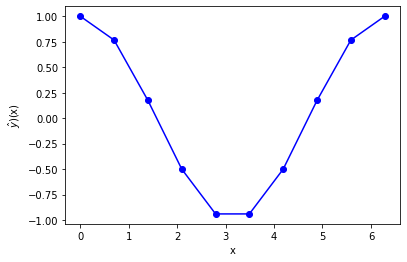

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

x = np.linspace(0,2*np.pi,10)
y = np.cos(x)

plt.ylabel("$\hat{y})$(x)")
plt.xlabel('x')
plt.plot(x,y,'-ob')

The following plot compares how some of the interpolated values compare to the original
 

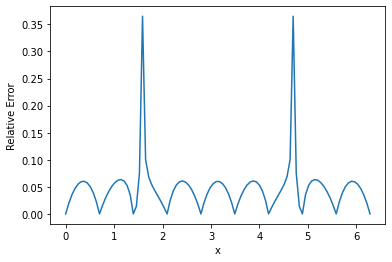

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

x = np.linspace(0,2*np.pi,10)
y = np.cos(x)
f = interp1d(x,y)

x_new = np.linspace(0,2*np.pi,100)

y_exact = np.cos(x_new)
y_interpolated = f(x_new)

error = np.abs((y_exact-y_interpolated)/y_exact)

plt.ylabel("Relative Error")
plt.xlabel('x')
plt.plot(x_new,error)

Note that there are points with zero error. These are the points where the original data comes from. We can see that the error increases the further that we get from the original. Ther are also two spikes, which we can see occurs at the zeros of cosine. 

We can also try the same for an exponential function. The following plot shows the same, but done for an exponential function.

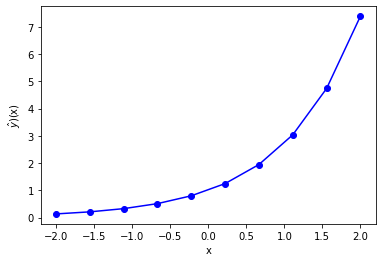

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

x = np.linspace(-2,2,10)
y = np.exp(x)

plt.ylabel("$\hat{y})$(x)")
plt.xlabel('x')
plt.plot(x,y,'-ob')

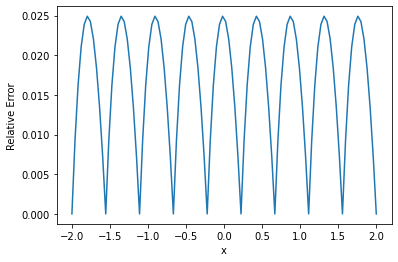

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

x = np.linspace(-2,2,10)
y = np.exp(x)
f = interp1d(x,y)

x_new = np.linspace(-2,2,100)

y_exact = np.exp(x_new)
y_interpolated = f(x_new)

error = np.abs((y_exact-y_interpolated)/y_exact)

plt.ylabel("Relative Error")
plt.xlabel('x')
plt.plot(x_new,error)

Note that once again that we see that the further we move away from the data, the larger the error is. Another issue with this interpolation scheme is that the resultant function has discontinuities in its derivative wherever a data point is. 


## Section 17.3: Cubic Spline Interpolation

In an attempt to improve our intepolation, we try another method: cubic spline interpolation. In this scheme, we use a collection of cubic functions as opposed to linear ones. For this, we have
 $$S_i(x)=a_ix^3+b_ix^2+c_ix+d_i$$
 for $x_i\leq x\leq x_{x+i}$, $i=1,...,n-1$. For these cubic functions, we have a few requirements
- The functions and their first and second derivatives are continuous at the meting points
- The end functions have a second derivative of zero.

This second point is not the only restriction that we can have, it can be switched to other things as well. If we were to have n data points, we would need to solve $4(n-1)$ equations. Below, we again test a cosine curve.



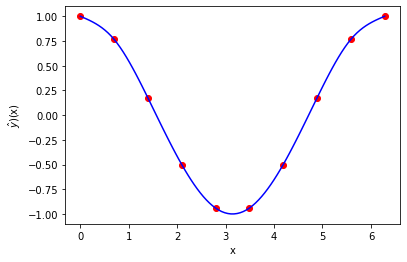

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

x = np.linspace(0,2*np.pi,10)
y = np.cos(x)
f = CubicSpline(x,y,bc_type = 'natural')

x_new = np.linspace(0,2*np.pi,100)
y_new = f(x_new)


plt.ylabel("$\hat{y})$(x)")
plt.xlabel('x')
plt.plot(x,y,'or')
plt.plot(x_new,y_new,'-b')

Note that this already looks better than the linear interpolation. We verify this by checking the relative error

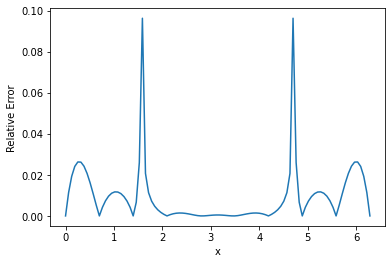

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

x = np.linspace(0,2*np.pi,10)
y = np.cos(x)
f = CubicSpline(x,y,bc_type='natural')

x_new = np.linspace(0,2*np.pi,100)

y_exact = np.cos(x_new)
y_interpolated = f(x_new)

error = np.abs((y_exact-y_interpolated)/y_exact)

plt.ylabel("Relative Error")
plt.xlabel('x')
plt.plot(x_new,error)

Note that while there is still some error around the roots and the edges, that this is significantly better than the linear interpoliation.
